In [441]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [442]:
pip install simulated_annealing

## Importing Data

In [443]:
original_data = pd.read_csv("drive/MyDrive/Research Methodology 2020/Dataset/GroupFormation Dataset - Sheet1.csv")
original_data['Student ID'] = original_data['Student ID'].str.replace('-','')
original_data

,Student ID,Course Code,Total,Credits,Semester,Gender,Marks Round,Grades
0,2160001,ENG1001,83.000,0,Spring-2016,female,83,A+
1,2160001,ENG1002,64.750,3,Summer-2016,female,65,B+
2,2160001,ACT1021,89.000,3,Summer-2016,female,89,A+
3,2160001,MATH1024,74.500,3,Summer-2016,female,75,A
4,2160001,MATH1034,91.000,3,Spring-2016,female,91,A+
...,...,...,...,...,...,...,...,...
36828,2172048,ECO2021,0.000,3,Summer-2019,male,0,F
36829,2172048,ECO2021,29.500,3,Summer-2019,male,30,F
36830,2172048,ECO2021,41.000,3,Summer-2019,male,41,D
36831,2172048,PHY1021,2.506,3,Summer-2019,male,3,F


# **Find and Drop Duplicate Data** 

In [444]:
#Sorted Data
sorted_data = original_data.sort_values(by=['Student ID','Course Code','Semester','Marks Round'])

# Drop Duplicates data
fresh_data = sorted_data.drop_duplicates(subset=['Student ID','Course Code'],keep='last')

# Count Duplicate Data
fresh_data[fresh_data.duplicated(['Student ID', 'Course Code'])].count()

# now original_data is fresh data
original_data = fresh_data.drop(['Total','Grades'],axis=1)

# Drop rows which Marks Round is lower than 40
original_data =  original_data[original_data['Marks Round'] >= 40]
original_data

,Student ID,Course Code,Credits,Semester,Gender,Marks Round
2,2160001,ACT1021,3,Summer-2016,female,89
27,2160001,CSE1011,3,Summer-2016,female,84
26,2160001,CSE1012,1,Summer-2016,female,84
6,2160001,CSE1013,3,Spring-2016,female,64
31,2160001,CSE1021,3,Fall-2016,female,88
...,...,...,...,...,...,...
36793,2172048,CSE1013,3,Summer-2018,male,46
36830,2172048,ECO2021,3,Summer-2019,male,41
36802,2172048,ENG1001,0,Spring-2018,male,40
36796,2172048,ENG1002,3,Summer-2018,male,50


In [445]:
original_data.dtypes

Student ID     object
Course Code    object
Credits         int64
Semester       object
Gender         object
Marks Round     int64
dtype: object

In [446]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23382 entries, 2 to 36803
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Student ID   23382 non-null  object
 1   Course Code  23382 non-null  object
 2   Credits      23382 non-null  int64 
 3   Semester     23382 non-null  object
 4   Gender       23382 non-null  object
 5   Marks Round  23382 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [447]:
original_data.describe()

,Credits,Marks Round
count,23382.00000,23382.000000
mean,2.37469,64.921863
std,0.97959,15.091334
min,0.00000,40.000000
25%,1.00000,52.000000
50%,3.00000,65.000000
75%,3.00000,76.000000
max,3.00000,100.000000


## Co-relations

In [448]:
# Co-relation of ogininal data
original_data.corr()

,Credits,Marks Round
Credits,1.000000,-0.125883
Marks Round,-0.125883,1.000000


## Data Cleaning


In [449]:
original_data.isna().sum()

Student ID     0
Course Code    0
Credits        0
Semester       0
Gender         0
Marks Round    0
dtype: int64

In [450]:
# Unique Studnets 
# len(original_data['Student ID'].unique())

In [451]:
# len(original_data['Semester'].unique())

In [452]:
# len(original_data['Course Code'].unique())

#Prerequisite Course

In [453]:
seu_curriculum = pd.read_csv("drive/MyDrive/Research Methodology 2020/Dataset/SEU Curriculum - Sheet1.csv")
seu_curriculum['Prerequisite'] = seu_curriculum['Prerequisite'].str.split('\n').str[0]
seu_curriculum

,Course Code,Course Title,Credits,Type,Course Prototype,Semester,Prerequisite,Minimum Credits,Alternate Course
0,ACT1021,Introduction to Accounting,3,General,THEORY_PRACTICAL,1,NaN,0,NaN
1,CSE1011,Programming Language I (C),3,Core,THEORY,1,CSE1013,0,NaN
2,CSE1012,Programming Language I (C) Lab,1,Core,PRACTICAL,1,CSE1013,0,NaN
3,CSE1013,Computer Fundamentals,3,Core,THEORY,1,NaN,0,NaN
4,CSE1021,Discrete Mathematics,3,Core,THEORY,1,CSE1012,0,NaN
...,...,...,...,...,...,...,...,...,...
77,PHY1021,Physics I,3,Core,THEORY,1,NaN,0,NaN
78,PHY1031,Physics II,3,Core,THEORY,1,PHY1021,0,NaN
79,PHY1034,Physics Lab,1,Core,PRACTICAL,1,PHY1021,0,NaN
80,SOC2031,Engineering Ethics,3,General,THEORY,1,NaN,0,NaN


In [454]:
prerequisite_course = seu_curriculum[['Course Code', 'Prerequisite']]
# prerequisite_course[prerequisite_course['Prerequisite'].isnull()]
prerequisite_course

,Course Code,Prerequisite
0,ACT1021,NaN
1,CSE1011,CSE1013
2,CSE1012,CSE1013
3,CSE1013,NaN
4,CSE1021,CSE1012
...,...,...
77,PHY1021,NaN
78,PHY1031,PHY1021
79,PHY1034,PHY1021
80,SOC2031,NaN


In [455]:
# getting prerequisite course
def getPrerequisite(courseCode):
  return str(prerequisite_course.loc[prerequisite_course['Course Code'] == courseCode, 'Prerequisite'].iloc[0])
  # return prerequisite_course.get(courseCode)

getPrerequisite('ENG1001')

'nan'

In [456]:
# Get All Prerequisite
def getAllPrerequisites(CourseCode):
  list = []
  prereq_course = getPrerequisite(CourseCode)
  while(prereq_course != 'nan'):
    list.append(prereq_course)
    # print(prereq_course)
    prereq_course = getPrerequisite(prereq_course)
  
  return list

getAllPrerequisites('MATH2015')

['MATH2014', 'MATH1034']

# Main WorkFlow

In [457]:
thirty_students = original_data[(original_data['Course Code'] == 'CSE2015') & (original_data['Semester'] == 'Fall-2017')]
thirty_students = thirty_students.head(30)
# Replacing Female to 0 and male to 1
thirty_students['Gender'].replace(['female','male'],[0,1],inplace=True)
thirty_students = thirty_students.reset_index(drop=True)
thirty_students

,Student ID,Course Code,Credits,Semester,Gender,Marks Round
0,2160001,CSE2015,3,Fall-2017,0,76
1,2160004,CSE2015,3,Fall-2017,0,56
2,2160008,CSE2015,3,Fall-2017,1,85
3,2160019,CSE2015,3,Fall-2017,0,61
4,2160020,CSE2015,3,Fall-2017,0,47
5,2160021,CSE2015,3,Fall-2017,0,50
6,2160028,CSE2015,3,Fall-2017,0,45
7,2160029,CSE2015,3,Fall-2017,0,53
8,2160032,CSE2015,3,Fall-2017,1,61
9,2160033,CSE2015,3,Fall-2017,1,72


# Random Cluster

In [458]:
# thirty_students = thirty_students.sort_values(by=['Marks Round'])
# thirty_students = thirty_students.sample(frac=1).reset_index(drop=True)

len = thirty_students.shape[0]
arr = []
for i in range(len):
  arr.append(i // 3)
# arr

# import collections
# collections.Counter(arr)

# suffle array
# np.random.seed(42)
# np.random.shuffle(arr)
# arr

thirty_students['Cluster'] = arr
thirty_students



,Student ID,Course Code,Credits,Semester,Gender,Marks Round,Cluster
0,2160001,CSE2015,3,Fall-2017,0,76,0
1,2160004,CSE2015,3,Fall-2017,0,56,0
2,2160008,CSE2015,3,Fall-2017,1,85,0
3,2160019,CSE2015,3,Fall-2017,0,61,1
4,2160020,CSE2015,3,Fall-2017,0,47,1
5,2160021,CSE2015,3,Fall-2017,0,50,1
6,2160028,CSE2015,3,Fall-2017,0,45,2
7,2160029,CSE2015,3,Fall-2017,0,53,2
8,2160032,CSE2015,3,Fall-2017,1,61,2
9,2160033,CSE2015,3,Fall-2017,1,72,3


In [459]:
# from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, AgglomerativeClustering, DBSCAN, Birch, OPTICS
# cluster_size = thirty_students.shape[0] // 3
# cl = KMeans(n_clusters=cluster_size,init='k-means++',random_state=10)
# cl = MeanShift(bandwidth=10, bin_seeding=True)
# cl = AffinityPropagation(damping=0.5)
# cl = AgglomerativeClustering(n_clusters=10)
# cl = DBSCAN(eps=3, min_samples=3,leaf_size= 3)
# cl = Birch(n_clusters=10, branching_factor=3)
# cl = OPTICS(min_samples=3)


# km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#        n_clusters=10, n_init=100, n_jobs=None, precompute_distances='auto',
#        random_state=None, tol=0.0001, verbose=0)
# y_predicted = cl.fit_predict(thirty_students[['Student ID','Credits','Gender','Marks Round']])
# y_predicted
# cl.fit(thirty_students[['Student ID', 'Marks Round']]).labels_


In [460]:
# count the cluster
# import collections
# collections.Counter(y_predicted)

In [461]:
len = thirty_students.shape[0]
arr = []

for i in range(len):
  arr.append(i // 3)

# suffle array
# np.random.seed(42)
np.random.shuffle(arr)

thirty_students['Cluster'] = arr
thirty_students

,Student ID,Course Code,Credits,Semester,Gender,Marks Round,Cluster
0,2160001,CSE2015,3,Fall-2017,0,76,9
1,2160004,CSE2015,3,Fall-2017,0,56,4
2,2160008,CSE2015,3,Fall-2017,1,85,1
3,2160019,CSE2015,3,Fall-2017,0,61,0
4,2160020,CSE2015,3,Fall-2017,0,47,9
5,2160021,CSE2015,3,Fall-2017,0,50,2
6,2160028,CSE2015,3,Fall-2017,0,45,6
7,2160029,CSE2015,3,Fall-2017,0,53,7
8,2160032,CSE2015,3,Fall-2017,1,61,0
9,2160033,CSE2015,3,Fall-2017,1,72,8


In [462]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

X = thirty_students[['Student ID','Credits','Gender','Marks Round']].values
y = thirty_students['Cluster'].values
  # Split the data into test and train sets                     
X_train, X_test, y_train, y_test = train_test_split(X, y)

# np.random.seed(42)
model = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)
# model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0

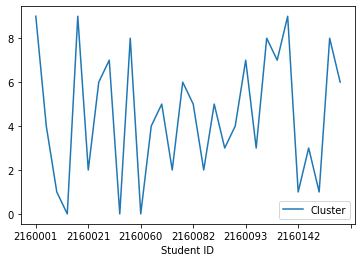

In [463]:
thirty_students.plot(x='Student ID', y='Cluster');

# Improving ML Model

In [464]:
def optimaizedGroupFormation(data, courseCode, semester):

  from sklearn import svm, datasets
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  from simulated_annealing.optimize import SimulatedAnneal
  from sklearn.linear_model import SGDClassifier
  from sklearn.neighbors import NearestNeighbors
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
  from sklearn.cluster import KMeans
  import random
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.compose import ColumnTransformer

  best_score = 0.0
  best_data = pd.DataFrame()

  for num in range(5):
    # thirty_students = thirty_students.sort_values(by=['Marks Round'])
    # thirty_students = thirty_students.sample(frac=1).reset_index(drop=True)
    # thirty_students = thirty_students.sample(frac=1)

    len = data.shape[0]
    cluster = []

    for i in range(len):
      cluster.append(i // 3)

    # random.shuffle(arr)

    # len_by = len // 3
    # for i in range(3):
    #   for j in range(len_by):
    #     arr.append(j)

    # suffle array
    # np.random.seed(42)
    # np.random.shuffle(arr)
    # arr

    data['Cluster'] = cluster



    X = data[['Student ID','Credits','Gender','Marks Round']].values
    y = data['Cluster'].values
    # Split the data into test and train sets                         
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    svc_params = {'C':np.logspace(-8, 10, 19, base=2),
                  'fit_intercept':[True, False]
                }
    # Using a linear SVM classifier             
    clf = svm.LinearSVC()
    # Initialize Simulated Annealing and fit
    sa = SimulatedAnneal(clf, svc_params, T=10.0, T_min=0.001, alpha=0.75,
                            verbose=True, max_iter=1, n_trans=5, max_runtime=300,
                            cv=3, scoring='f1_macro', refit=True)
    sa.fit(X_train, y_train)

    model = RandomForestRegressor().fit(X_train, y_train)
    current_score = model.score(X_test, y_test) * 100
    print(f"Model accuracy on test set: {current_score:.2f}%")
    print("")
    if(current_score > best_score):
      best_score = current_score
      best_data = data

  print(f"Best Score ========================> {best_score:.2f}%")
  final_data = best_data.drop(['Marks Round'],axis=1)
  final_data['Course Code'] = courseCode
  final_data['Semester'] = semester
  return final_data

In [465]:
data = thirty_students
courseCode = 'CSE4029'
semester = 'Fall-2020'
result = optimaizedGroupFormation(data, courseCode ,semester)
result


INFO: Number of possible iterations given cooling schedule: 160

2 T: 10.00000, score: 0.022222, std: 0.031427, params: {'C': 256.0, 'fit_intercept': True}
3 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': False}
4 T: 10.00000, score: 0.022222, std: 0.031427, params: {'C': 256.0, 'fit_intercept': True}
5 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 0.03125, 'fit_intercept': True}
6 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 0.03125, 'fit_intercept': False}
7 T: 7.50000, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': False}
8 T: 7.50000, score: 0.024691, std: 0.017459, params: {'C': 2.0, 'fit_intercept': False}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

9 T: 7.50000, score: 0.028219, std: 0.020416, params: {'C': 8.0, 'fit_intercept': False}
10 T: 7.50000, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': False}
11 T: 7.50000, score: 0.034568, std: 0.027272, params: {'C': 4.0, 'fit_intercept': False}
12 T: 5.62500, score: 0.024691, std: 0.017459, params: {'C': 4.0, 'fit_intercept': True}
13 T: 5.62500, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
14 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
15 T: 5.62500, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
16 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
17 T: 4.21875, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
18 T: 4.21875, score: 0.044444, std: 0.031427, params: {'C': 64.0, 'fit_intercept': True}
19 T: 4.21875, score: 0.034568, std: 0.027272, params: {'C': 1024.0, 'fit_intercept': Tr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

22 T: 3.16406, score: 0.056790, std: 0.013968, params: {'C': 1.0, 'fit_intercept': False}
23 T: 3.16406, score: 0.034568, std: 0.027272, params: {'C': 4.0, 'fit_intercept': False}
24 T: 3.16406, score: 0.024691, std: 0.017459, params: {'C': 4.0, 'fit_intercept': True}
25 T: 3.16406, score: 0.012346, std: 0.017459, params: {'C': 0.00390625, 'fit_intercept': True}
26 T: 3.16406, score: 0.012346, std: 0.017459, params: {'C': 128.0, 'fit_intercept': True}
27 T: 2.37305, score: 0.024691, std: 0.017459, params: {'C': 128.0, 'fit_intercept': False}
28 T: 2.37305, score: 0.012346, std: 0.017459, params: {'C': 32.0, 'fit_intercept': False}
29 T: 2.37305, score: 0.034568, std: 0.027272, params: {'C': 32.0, 'fit_intercept': True}
30 T: 2.37305, score: 0.024691, std: 0.017459, params: {'C': 4.0, 'fit_intercept': True}
31 T: 2.37305, score: 0.000000, std: 0.000000, params: {'C': 16.0, 'fit_intercept': True}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

32 T: 1.77979, score: 0.022222, std: 0.031427, params: {'C': 16.0, 'fit_intercept': False}
33 T: 1.77979, score: 0.000000, std: 0.000000, params: {'C': 16.0, 'fit_intercept': True}
34 T: 1.77979, score: 0.022222, std: 0.031427, params: {'C': 16.0, 'fit_intercept': False}
35 T: 1.77979, score: 0.000000, std: 0.000000, params: {'C': 16.0, 'fit_intercept': True}
36 T: 1.77979, score: 0.034568, std: 0.027272, params: {'C': 32.0, 'fit_intercept': True}
37 T: 1.33484, score: 0.012346, std: 0.017459, params: {'C': 32.0, 'fit_intercept': False}
38 T: 1.33484, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': False}
39 T: 1.33484, score: 0.022222, std: 0.031427, params: {'C': 512.0, 'fit_intercept': True}
40 T: 1.33484, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': False}
41 T: 1.33484, score: 0.022222, std: 0.031427, params: {'C': 512.0, 'fit_intercept': True}
42 T: 1.00113, score: 0.034568, std: 0.027272, params: {'C': 0.5, 'fit_intercept': True}
43

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

55 T: 0.56314, score: 0.012346, std: 0.017459, params: {'C': 64.0, 'fit_intercept': False}
56 T: 0.56314, score: 0.028219, std: 0.020416, params: {'C': 8.0, 'fit_intercept': False}
57 T: 0.42235, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': False}
58 T: 0.42235, score: 0.022222, std: 0.031427, params: {'C': 512.0, 'fit_intercept': True}
59 T: 0.42235, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': False}
60 T: 0.42235, score: 0.022222, std: 0.031427, params: {'C': 512.0, 'fit_intercept': True}
61 T: 0.42235, score: 0.034568, std: 0.027272, params: {'C': 32.0, 'fit_intercept': True}
62 T: 0.31676, score: 0.034568, std: 0.027272, params: {'C': 0.0078125, 'fit_intercept': True}
63 T: 0.31676, score: 0.000000, std: 0.000000, params: {'C': 0.0078125, 'fit_intercept': False}
64 T: 0.31676, score: 0.034568, std: 0.027272, params: {'C': 0.0078125, 'fit_intercept': True}
65 T: 0.31676, score: 0.000000, std: 0.000000, params: {'C': 0.0078125, 'fit_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

113 T: 0.01784, score: 0.012346, std: 0.017459, params: {'C': 0.25, 'fit_intercept': False}
114 T: 0.01784, score: 0.022222, std: 0.031427, params: {'C': 0.5, 'fit_intercept': False}
115 T: 0.01784, score: 0.034568, std: 0.027272, params: {'C': 0.5, 'fit_intercept': True}
116 T: 0.01784, score: 0.022222, std: 0.031427, params: {'C': 0.5, 'fit_intercept': False}
117 T: 0.01338, score: 0.024250, std: 0.017156, params: {'C': 1024.0, 'fit_intercept': False}
118 T: 0.01338, score: 0.024691, std: 0.017459, params: {'C': 128.0, 'fit_intercept': False}
119 T: 0.01338, score: 0.028219, std: 0.020416, params: {'C': 8.0, 'fit_intercept': False}
120 T: 0.01338, score: 0.024691, std: 0.017459, params: {'C': 8.0, 'fit_intercept': True}
121 T: 0.01338, score: 0.028219, std: 0.020416, params: {'C': 8.0, 'fit_intercept': False}
122 T: 0.01003, score: 0.012346, std: 0.017459, params: {'C': 0.25, 'fit_intercept': False}
123 T: 0.01003, score: 0.024691, std: 0.017459, params: {'C': 0.015625, 'fit_intercep

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 



INFO: Number of possible iterations given cooling schedule: 160

2 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 4.0, 'fit_intercept': False}
3 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': False}
4 T: 10.00000, score: 0.039012, std: 0.032690, params: {'C': 512.0, 'fit_intercept': False}
5 T: 10.00000, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': True}
6 T: 10.00000, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
7 T: 7.50000, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
8 T: 7.50000, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
9 T: 7.50000, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
10 T: 7.50000, score: 0.039012, std: 0.032690, params: {'C': 512.0, 'fit_intercept': False}
11 T: 7.50000, score: 0.024691, std: 0.017459, params: {'C': 0.03125, 'fit_intercept': False}
12 T: 5.625

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

13 T: 5.62500, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 'fit_intercept': False}
14 T: 5.62500, score: 0.019048, std: 0.026937, params: {'C': 0.00390625, 'fit_intercept': True}
15 T: 5.62500, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 'fit_intercept': False}
16 T: 5.62500, score: 0.019048, std: 0.026937, params: {'C': 0.00390625, 'fit_intercept': True}
17 T: 4.21875, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 'fit_intercept': False}
18 T: 4.21875, score: 0.019048, std: 0.026937, params: {'C': 0.00390625, 'fit_intercept': True}
19 T: 4.21875, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 'fit_intercept': False}
20 T: 4.21875, score: 0.019048, std: 0.026937, params: {'C': 0.00390625, 'fit_intercept': True}
21 T: 4.21875, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 'fit_intercept': False}
22 T: 3.16406, score: 0.000000, std: 0.000000, params: {'C': 2.0, 'fit_intercept': False}
23 T: 3.16406, score: 0.012346, std: 0.01

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

32 T: 1.77979, score: 0.024691, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': True}
33 T: 1.77979, score: 0.012346, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': False}
34 T: 1.77979, score: 0.024691, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': True}
35 T: 1.77979, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
36 T: 1.77979, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': True}
37 T: 1.33484, score: 0.000000, std: 0.000000, params: {'C': 128.0, 'fit_intercept': True}
38 T: 1.33484, score: 0.012346, std: 0.017459, params: {'C': 128.0, 'fit_intercept': False}
39 T: 1.33484, score: 0.039012, std: 0.032690, params: {'C': 512.0, 'fit_intercept': False}
40 T: 1.33484, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': True}
41 T: 1.33484, score: 0.039012, std: 0.032690, params: {'C': 512.0, 'fit_intercept': False}
42 T: 1.00113, score: 0.022222, std: 0.031427, params: {'C': 0.00390625, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

59 T: 0.42235, score: 0.039012, std: 0.032690, params: {'C': 1.0, 'fit_intercept': False}
60 T: 0.42235, score: 0.012346, std: 0.017459, params: {'C': 1.0, 'fit_intercept': True}
61 T: 0.42235, score: 0.022222, std: 0.031427, params: {'C': 0.0625, 'fit_intercept': True}
62 T: 0.31676, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
63 T: 0.31676, score: 0.034568, std: 0.027272, params: {'C': 32.0, 'fit_intercept': False}
64 T: 0.31676, score: 0.000000, std: 0.000000, params: {'C': 32.0, 'fit_intercept': True}
65 T: 0.31676, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': True}
66 T: 0.31676, score: 0.022222, std: 0.031427, params: {'C': 256.0, 'fit_intercept': False}
67 T: 0.23757, score: 0.012346, std: 0.017459, params: {'C': 0.5, 'fit_intercept': False}
68 T: 0.23757, score: 0.012346, std: 0.017459, params: {'C': 256.0, 'fit_intercept': True}
69 T: 0.23757, score: 0.012346, std: 0.017459, params: {'C': 4.0, 'fit_intercept': True}
70

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

91 T: 0.07517, score: 0.000000, std: 0.000000, params: {'C': 16.0, 'fit_intercept': False}
92 T: 0.05638, score: 0.014815, std: 0.020951, params: {'C': 16.0, 'fit_intercept': True}
93 T: 0.05638, score: 0.012346, std: 0.017459, params: {'C': 512.0, 'fit_intercept': True}
94 T: 0.05638, score: 0.024691, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': True}
95 T: 0.05638, score: 0.012346, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': False}
96 T: 0.05638, score: 0.034568, std: 0.027272, params: {'C': 0.125, 'fit_intercept': False}
97 T: 0.04228, score: 0.027160, std: 0.019442, params: {'C': 0.125, 'fit_intercept': True}
98 T: 0.04228, score: 0.034568, std: 0.027272, params: {'C': 0.125, 'fit_intercept': False}
99 T: 0.04228, score: 0.027160, std: 0.019442, params: {'C': 0.125, 'fit_intercept': True}
100 T: 0.04228, score: 0.034568, std: 0.027272, params: {'C': 0.125, 'fit_intercept': False}
101 T: 0.04228, score: 0.012346, std: 0.017459, params: {'C': 1024.0, 'fit_int

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

11 T: 7.50000, score: 0.009259, std: 0.013095, params: {'C': 256.0, 'fit_intercept': False}
12 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
13 T: 5.62500, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_intercept': True}
14 T: 5.62500, score: 0.009259, std: 0.013095, params: {'C': 32.0, 'fit_intercept': True}
15 T: 5.62500, score: 0.014815, std: 0.020951, params: {'C': 0.125, 'fit_intercept': True}
16 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': False}
17 T: 4.21875, score: 0.009259, std: 0.013095, params: {'C': 0.03125, 'fit_intercept': False}
18 T: 4.21875, score: 0.009259, std: 0.013095, params: {'C': 0.0078125, 'fit_intercept': False}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

19 T: 4.21875, score: 0.000000, std: 0.000000, params: {'C': 0.0078125, 'fit_intercept': True}
20 T: 4.21875, score: 0.009259, std: 0.013095, params: {'C': 0.0078125, 'fit_intercept': False}
21 T: 4.21875, score: 0.000000, std: 0.000000, params: {'C': 0.0078125, 'fit_intercept': True}
22 T: 3.16406, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_intercept': True}
23 T: 3.16406, score: 0.000000, std: 0.000000, params: {'C': 0.5, 'fit_intercept': True}
24 T: 3.16406, score: 0.000000, std: 0.000000, params: {'C': 0.5, 'fit_intercept': False}
25 T: 3.16406, score: 0.009259, std: 0.013095, params: {'C': 2.0, 'fit_intercept': False}
26 T: 3.16406, score: 0.000000, std: 0.000000, params: {'C': 2.0, 'fit_intercept': True}
27 T: 2.37305, score: 0.009259, std: 0.013095, params: {'C': 2.0, 'fit_intercept': False}
28 T: 2.37305, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
29 T: 2.37305, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_interce

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

36 T: 1.77979, score: 0.009259, std: 0.013095, params: {'C': 0.015625, 'fit_intercept': False}
37 T: 1.33484, score: 0.009259, std: 0.013095, params: {'C': 0.0078125, 'fit_intercept': False}
38 T: 1.33484, score: 0.042593, std: 0.042147, params: {'C': 4.0, 'fit_intercept': False}
39 T: 1.33484, score: 0.009259, std: 0.013095, params: {'C': 4.0, 'fit_intercept': True}
40 T: 1.33484, score: 0.042593, std: 0.042147, params: {'C': 4.0, 'fit_intercept': False}
41 T: 1.33484, score: 0.009259, std: 0.013095, params: {'C': 4.0, 'fit_intercept': True}
42 T: 1.00113, score: 0.024074, std: 0.018332, params: {'C': 8.0, 'fit_intercept': True}
43 T: 1.00113, score: 0.024074, std: 0.018332, params: {'C': 0.03125, 'fit_intercept': True}
44 T: 1.00113, score: 0.009259, std: 0.013095, params: {'C': 0.03125, 'fit_intercept': False}
45 T: 1.00113, score: 0.024074, std: 0.018332, params: {'C': 0.03125, 'fit_intercept': True}
46 T: 1.00113, score: 0.042593, std: 0.042147, params: {'C': 512.0, 'fit_intercept

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

76 T: 0.17818, score: 0.009259, std: 0.013095, params: {'C': 16.0, 'fit_intercept': False}
77 T: 0.13363, score: 0.042593, std: 0.042147, params: {'C': 16.0, 'fit_intercept': True}
78 T: 0.13363, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_intercept': True}
79 T: 0.13363, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
80 T: 0.13363, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_intercept': True}
81 T: 0.13363, score: 0.009259, std: 0.013095, params: {'C': 1024.0, 'fit_intercept': True}
82 T: 0.10023, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
83 T: 0.10023, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
84 T: 0.10023, score: 0.057407, std: 0.030877, params: {'C': 0.0625, 'fit_intercept': True}
85 T: 0.10023, score: 0.000000, std: 0.000000, params: {'C': 0.0625, 'fit_intercept': False}
86 T: 0.10023, score: 0.009259, std: 0.013095, params: {'C': 0.0078125, 'fit_in

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase th

Model accuracy on test set: 93.57%


INFO: Number of possible iterations given cooling schedule: 160

2 T: 10.00000, score: 0.055026, std: 0.016462, params: {'C': 0.03125, 'fit_intercept': False}
3 T: 10.00000, score: 0.000000, std: 0.000000, params: {'C': 0.03125, 'fit_intercept': True}
4 T: 10.00000, score: 0.022222, std: 0.031427, params: {'C': 32.0, 'fit_intercept': True}
5 T: 10.00000, score: 0.022222, std: 0.031427, params: {'C': 128.0, 'fit_intercept': True}
6 T: 10.00000, score: 0.028219, std: 0.020416, params: {'C': 128.0, 'fit_intercept': False}
7 T: 7.50000, score: 0.022222, std: 0.031427, params: {'C': 128.0, 'fit_intercept': True}
8 T: 7.50000, score: 0.028219, std: 0.020416, params: {'C': 128.0, 'fit_intercept': False}
9 T: 7.50000, score: 0.022222, std: 0.031427, params: {'C': 128.0, 'fit_intercept': True}
10 T: 7.50000, score: 0.045150, std: 0.015367, params: {'C': 512.0, 'fit_intercept': True}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

11 T: 7.50000, score: 0.034568, std: 0.027272, params: {'C': 512.0, 'fit_intercept': False}
12 T: 5.62500, score: 0.032804, std: 0.027227, params: {'C': 32.0, 'fit_intercept': False}
13 T: 5.62500, score: 0.022222, std: 0.031427, params: {'C': 32.0, 'fit_intercept': True}
14 T: 5.62500, score: 0.032804, std: 0.027227, params: {'C': 32.0, 'fit_intercept': False}
15 T: 5.62500, score: 0.028219, std: 0.020416, params: {'C': 128.0, 'fit_intercept': False}
16 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': False}
17 T: 4.21875, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': True}
18 T: 4.21875, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': False}
19 T: 4.21875, score: 0.022928, std: 0.016356, params: {'C': 2.0, 'fit_intercept': False}
20 T: 4.21875, score: 0.022928, std: 0.016356, params: {'C': 256.0, 'fit_intercept': False}
21 T: 4.21875, score: 0.045150, std: 0.015367, params: {'C': 0.00390625, 'fit_intercept

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

22 T: 3.16406, score: 0.000000, std: 0.000000, params: {'C': 0.00390625, 'fit_intercept': True}
23 T: 3.16406, score: 0.045150, std: 0.015367, params: {'C': 0.00390625, 'fit_intercept': False}
24 T: 3.16406, score: 0.012346, std: 0.017459, params: {'C': 0.0625, 'fit_intercept': False}
25 T: 3.16406, score: 0.022928, std: 0.016356, params: {'C': 0.0625, 'fit_intercept': True}
26 T: 3.16406, score: 0.012346, std: 0.017459, params: {'C': 0.0625, 'fit_intercept': False}
27 T: 2.37305, score: 0.055026, std: 0.016462, params: {'C': 0.03125, 'fit_intercept': False}
28 T: 2.37305, score: 0.000000, std: 0.000000, params: {'C': 0.03125, 'fit_intercept': True}
29 T: 2.37305, score: 0.055026, std: 0.016462, params: {'C': 0.03125, 'fit_intercept': False}
30 T: 2.37305, score: 0.012346, std: 0.017459, params: {'C': 8.0, 'fit_intercept': False}
31 T: 2.37305, score: 0.010582, std: 0.014965, params: {'C': 1024.0, 'fit_intercept': False}
32 T: 1.77979, score: 0.035273, std: 0.002494, params: {'C': 1024

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

40 T: 1.33484, score: 0.045150, std: 0.015367, params: {'C': 1.0, 'fit_intercept': True}
41 T: 1.33484, score: 0.010582, std: 0.014965, params: {'C': 1.0, 'fit_intercept': False}
42 T: 1.00113, score: 0.045150, std: 0.015367, params: {'C': 1.0, 'fit_intercept': True}
43 T: 1.00113, score: 0.010582, std: 0.014965, params: {'C': 1.0, 'fit_intercept': False}
44 T: 1.00113, score: 0.045150, std: 0.015367, params: {'C': 1.0, 'fit_intercept': True}
45 T: 1.00113, score: 0.010582, std: 0.014965, params: {'C': 1.0, 'fit_intercept': False}
46 T: 1.00113, score: 0.022222, std: 0.031427, params: {'C': 0.25, 'fit_intercept': False}
47 T: 0.75085, score: 0.010582, std: 0.014965, params: {'C': 0.25, 'fit_intercept': True}
48 T: 0.75085, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': True}
49 T: 0.75085, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': False}
50 T: 0.75085, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': True}
51 T: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

77 T: 0.13363, score: 0.010582, std: 0.014965, params: {'C': 0.0078125, 'fit_intercept': True}
78 T: 0.13363, score: 0.022222, std: 0.031427, params: {'C': 0.0078125, 'fit_intercept': False}
79 T: 0.13363, score: 0.010582, std: 0.014965, params: {'C': 0.0078125, 'fit_intercept': True}
80 T: 0.13363, score: 0.022222, std: 0.031427, params: {'C': 256.0, 'fit_intercept': True}
81 T: 0.13363, score: 0.022928, std: 0.016356, params: {'C': 256.0, 'fit_intercept': False}
82 T: 0.10023, score: 0.022222, std: 0.031427, params: {'C': 256.0, 'fit_intercept': True}
83 T: 0.10023, score: 0.022928, std: 0.016356, params: {'C': 256.0, 'fit_intercept': False}
84 T: 0.10023, score: 0.034568, std: 0.027272, params: {'C': 512.0, 'fit_intercept': False}
85 T: 0.10023, score: 0.022928, std: 0.016356, params: {'C': 16.0, 'fit_intercept': False}
86 T: 0.10023, score: 0.010582, std: 0.014965, params: {'C': 16.0, 'fit_intercept': True}
87 T: 0.07517, score: 0.027778, std: 0.039284, params: {'C': 2.0, 'fit_inte

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

99 T: 0.04228, score: 0.010582, std: 0.014965, params: {'C': 0.015625, 'fit_intercept': False}
100 T: 0.04228, score: 0.055026, std: 0.016462, params: {'C': 0.03125, 'fit_intercept': False}
101 T: 0.04228, score: 0.010582, std: 0.014965, params: {'C': 1.0, 'fit_intercept': False}
102 T: 0.03171, score: 0.022928, std: 0.016356, params: {'C': 256.0, 'fit_intercept': False}
103 T: 0.03171, score: 0.010582, std: 0.014965, params: {'C': 0.015625, 'fit_intercept': False}
104 T: 0.03171, score: 0.024691, std: 0.017459, params: {'C': 0.015625, 'fit_intercept': True}
105 T: 0.03171, score: 0.035273, std: 0.002494, params: {'C': 64.0, 'fit_intercept': True}
106 T: 0.03171, score: 0.022222, std: 0.031427, params: {'C': 128.0, 'fit_intercept': True}
107 T: 0.02378, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': True}
108 T: 0.02378, score: 0.000000, std: 0.000000, params: {'C': 0.125, 'fit_intercept': False}
109 T: 0.02378, score: 0.034568, std: 0.027272, params: {'C': 512.0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

Model accuracy on test set: 98.00%


INFO: Number of possible iterations given cooling schedule: 160

2 T: 10.00000, score: 0.022928, std: 0.016356, params: {'C': 0.00390625, 'fit_intercept': False}
3 T: 10.00000, score: 0.029630, std: 0.023376, params: {'C': 8.0, 'fit_intercept': False}
4 T: 10.00000, score: 0.022928, std: 0.016356, params: {'C': 8.0, 'fit_intercept': True}
5 T: 10.00000, score: 0.021164, std: 0.014965, params: {'C': 256.0, 'fit_intercept': True}
6 T: 10.00000, score: 0.022928, std: 0.016356, params: {'C': 2.0, 'fit_intercept': True}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

7 T: 7.50000, score: 0.041975, std: 0.010940, params: {'C': 2.0, 'fit_intercept': False}
8 T: 7.50000, score: 0.022928, std: 0.016356, params: {'C': 2.0, 'fit_intercept': True}
9 T: 7.50000, score: 0.041975, std: 0.010940, params: {'C': 2.0, 'fit_intercept': False}
10 T: 7.50000, score: 0.032804, std: 0.027227, params: {'C': 32.0, 'fit_intercept': False}
11 T: 7.50000, score: 0.033510, std: 0.002494, params: {'C': 32.0, 'fit_intercept': True}
12 T: 5.62500, score: 0.051852, std: 0.014739, params: {'C': 0.25, 'fit_intercept': True}
13 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.25, 'fit_intercept': False}
14 T: 5.62500, score: 0.051852, std: 0.014739, params: {'C': 0.25, 'fit_intercept': True}
15 T: 5.62500, score: 0.000000, std: 0.000000, params: {'C': 0.25, 'fit_intercept': False}
16 T: 5.62500, score: 0.051852, std: 0.014739, params: {'C': 0.25, 'fit_intercept': True}
17 T: 4.21875, score: 0.022928, std: 0.016356, params: {'C': 2.0, 'fit_intercept': True}
18 T: 4.2187

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

21 T: 4.21875, score: 0.021164, std: 0.014965, params: {'C': 0.015625, 'fit_intercept': True}
22 T: 3.16406, score: 0.010582, std: 0.014965, params: {'C': 0.125, 'fit_intercept': True}
23 T: 3.16406, score: 0.012346, std: 0.017459, params: {'C': 0.0078125, 'fit_intercept': True}
24 T: 3.16406, score: 0.041534, std: 0.011155, params: {'C': 0.0078125, 'fit_intercept': False}
25 T: 3.16406, score: 0.041975, std: 0.010940, params: {'C': 2.0, 'fit_intercept': False}
26 T: 3.16406, score: 0.022928, std: 0.016356, params: {'C': 2.0, 'fit_intercept': True}
27 T: 2.37305, score: 0.021164, std: 0.014965, params: {'C': 256.0, 'fit_intercept': True}
28 T: 2.37305, score: 0.033510, std: 0.002494, params: {'C': 32.0, 'fit_intercept': True}
29 T: 2.37305, score: 0.032804, std: 0.027227, params: {'C': 32.0, 'fit_intercept': False}
30 T: 2.37305, score: 0.033510, std: 0.002494, params: {'C': 4.0, 'fit_intercept': False}
31 T: 2.37305, score: 0.022928, std: 0.016356, params: {'C': 4.0, 'fit_intercept': 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklear

42 T: 1.00113, score: 0.050441, std: 0.047610, params: {'C': 64.0, 'fit_intercept': True}
43 T: 1.00113, score: 0.031393, std: 0.023667, params: {'C': 1024.0, 'fit_intercept': True}
44 T: 1.00113, score: 0.000000, std: 0.000000, params: {'C': 16.0, 'fit_intercept': True}
45 T: 1.00113, score: 0.022928, std: 0.016356, params: {'C': 16.0, 'fit_intercept': False}
46 T: 1.00113, score: 0.041975, std: 0.010940, params: {'C': 2.0, 'fit_intercept': False}
47 T: 0.75085, score: 0.010582, std: 0.014965, params: {'C': 0.125, 'fit_intercept': False}
48 T: 0.75085, score: 0.010582, std: 0.014965, params: {'C': 0.125, 'fit_intercept': True}
49 T: 0.75085, score: 0.012346, std: 0.017459, params: {'C': 0.0625, 'fit_intercept': True}
50 T: 0.75085, score: 0.041975, std: 0.010940, params: {'C': 0.0625, 'fit_intercept': False}
51 T: 0.75085, score: 0.012346, std: 0.017459, params: {'C': 0.0625, 'fit_intercept': True}
52 T: 0.56314, score: 0.041975, std: 0.010940, params: {'C': 0.0625, 'fit_intercept': F

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

56 T: 0.56314, score: 0.021164, std: 0.014965, params: {'C': 0.015625, 'fit_intercept': False}
57 T: 0.42235, score: 0.000000, std: 0.000000, params: {'C': 0.25, 'fit_intercept': False}
58 T: 0.42235, score: 0.051852, std: 0.014739, params: {'C': 0.25, 'fit_intercept': True}
59 T: 0.42235, score: 0.022928, std: 0.016356, params: {'C': 512.0, 'fit_intercept': True}
60 T: 0.42235, score: 0.019048, std: 0.026937, params: {'C': 512.0, 'fit_intercept': False}
61 T: 0.42235, score: 0.022928, std: 0.016356, params: {'C': 512.0, 'fit_intercept': True}
62 T: 0.31676, score: 0.019048, std: 0.026937, params: {'C': 512.0, 'fit_intercept': False}
63 T: 0.31676, score: 0.022928, std: 0.016356, params: {'C': 512.0, 'fit_intercept': True}
64 T: 0.31676, score: 0.019048, std: 0.026937, params: {'C': 512.0, 'fit_intercept': False}
65 T: 0.31676, score: 0.041975, std: 0.010940, params: {'C': 2.0, 'fit_intercept': False}
66 T: 0.31676, score: 0.032804, std: 0.027227, params: {'C': 32.0, 'fit_intercept': F

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Student ID,Course Code,Credits,Semester,Gender,Cluster
0,2160001,CSE4029,3,Fall-2020,0,0
1,2160004,CSE4029,3,Fall-2020,0,0
2,2160008,CSE4029,3,Fall-2020,1,0
3,2160019,CSE4029,3,Fall-2020,0,1
4,2160020,CSE4029,3,Fall-2020,0,1
5,2160021,CSE4029,3,Fall-2020,0,1
6,2160028,CSE4029,3,Fall-2020,0,2
7,2160029,CSE4029,3,Fall-2020,0,2
8,2160032,CSE4029,3,Fall-2020,1,2
9,2160033,CSE4029,3,Fall-2020,1,3


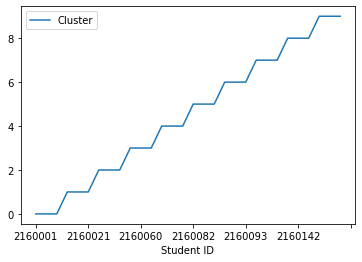

In [466]:
result.plot(x='Student ID', y='Cluster');

In [467]:
# Print the best score and the best params
# print(sa.best_score_, sa.best_params_)
# Use the best estimator to predict classes
# optimized_clf = sa.best_estimator_
# y_test_pred = optimized_clf.predict(X_test)
# Print a report of precision, recall, f1_score
# print(classification_report(y_test, y_test_pred));

In [468]:
# y_preds = clf.predict(X_test)
# y_preds

In [469]:
# y_test

In [470]:
# clf.score(X_train, y_train)

In [471]:
# confusion_matrix(y_test, y_preds)

In [472]:
# accuracy_score(y_test, y_preds)

In [473]:
# 2. Choose the right model and hyperparameters
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
# clf.get_params()

In [474]:
# # 5. Improve a model
# from sklearn.ensemble import RandomForestClassifier
# # Try different amount of n_estimators
# # np.random.seed(42)
# print(f"Trying model with {20} estimators...")
# clf = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)
# print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
# print("")
# for i in range(10, 100, 10):
#     print(f"Trying model with {i} estimators...")
#     clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
#     print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
#     print("")

In [475]:
# 6. Save a model and load it
# import pickle

# pickle.dump(model, open("random_forst_model_1.pkl", "wb"))

In [476]:
# loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
# loaded_model.score(X_test, y_test)

# Working with Testing Data

In [477]:
testing_data = pd.read_csv("drive/MyDrive/Research Methodology 2020/Dataset/GroupFormation Dataset - Testing Data.csv")
testing_data['Student ID'] = testing_data['Student ID'].str.replace('-','')
testing_data

,Student ID,Course Code,Credit Hour,Semester
0,2170022,CSE4029,3,Fall-2019
1,2170023,CSE4029,3,Fall-2019
2,2170024,CSE4029,3,Fall-2019
3,2170025,CSE4029,3,Fall-2019
4,2170026,CSE4029,3,Fall-2019
5,2170027,CSE4029,3,Fall-2019
6,2170028,CSE4029,3,Fall-2019
7,2170029,CSE4029,3,Fall-2019
8,2170030,CSE4029,3,Fall-2019
9,2170031,CSE4029,3,Fall-2019


In [478]:
getPrerequisite('CSE4029')

'CSE2015'

In [479]:
s = pd.DataFrame({'Student ID':[], 'Course Code':[], 'Credits':[], 'Semester':[], 'Gender':[], 'Marks Round': []})
c = original_data[(original_data['Student ID'] == '2170022') & (original_data['Course Code'] == 'CSE2015')]
s.append(c, ignore_index=True)
s

,Student ID,Course Code,Credits,Semester,Gender,Marks Round


In [480]:
student_ids = testing_data['Student ID'].values
student_ids

array(['2170022', '2170023', '2170024', '2170025', '2170026', '2170027',
       '2170028', '2170029', '2170030', '2170031', '2170032', '2170033',
       '2170034', '2170035', '2170036', '2170037', '2170038', '2170039',
       '2170040', '2170041', '2170042', '2170043', '2170044', '2170045',
       '2170046', '2170047', '2170048', '2170049', '2170050'],
      dtype=object)

In [481]:
pre_data = pd.DataFrame({'Student ID':[], 'Course Code':[], 'Credits':[], 'Semester':[], 'Gender':[], 'Marks Round': []})
for id in student_ids:
  if(not original_data[(original_data['Student ID'] == id) & (original_data['Course Code'] == 'CSE2015')].empty):
    row = original_data[(original_data['Student ID'] == id) & (original_data['Course Code'] == 'CSE2015')]
    pre_data.append(row)
pre_data

,Student ID,Course Code,Credits,Semester,Gender,Marks Round


In [482]:
original_data[(original_data['Student ID'] == '2170023') & (original_data['Course Code'] == 'CSE2015')]

,Student ID,Course Code,Credits,Semester,Gender,Marks Round


In [483]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2)

,A,B
0,1,2
1,3,4
0,5,6
1,7,8
